In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [25]:
df = pd.read_csv('./deep_source_files/wine.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [27]:
df.iloc[:, 12]

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: 12, Length: 6497, dtype: int64

In [28]:
# binary classification, muliti classification 두 가지 방식으로 nural network model을 만들고 
# train data로 학습시킨 후 test data로 accuracy를 평가하시오

In [29]:
y = df.iloc[:, 12].values
x = df.iloc[:, :12].values

In [30]:
y_oh = tf.keras.utils.to_categorical(y)

In [31]:
# binary

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [33]:
x.shape

(6497, 12)

In [34]:
model = Sequential()
model.add(Dense(36, activation='relu', input_dim=12))
model.add(Dense(18, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 36)                468       
                                                                 
 dense_5 (Dense)             (None, 18)                666       
                                                                 
 dense_6 (Dense)             (None, 9)                 171       
                                                                 
 dense_7 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [41]:
x_train.shape

(4872, 12)

In [42]:
y_train.shape

(4872,)

In [43]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [44]:
model.fit(x_train.astype(float), y_train, epochs=50, batch_size=20)

Epoch 1/50
244/244 [==============================] - 1s 847us/step - loss: 0.2216 - accuracy: 0.9208
Epoch 2/50
244/244 [==============================] - 0s 823us/step - loss: 0.1876 - accuracy: 0.9349
Epoch 3/50
244/244 [==============================] - 0s 816us/step - loss: 0.1734 - accuracy: 0.9419
Epoch 4/50
244/244 [==============================] - 0s 855us/step - loss: 0.1520 - accuracy: 0.9493
Epoch 5/50
244/244 [==============================] - 0s 846us/step - loss: 0.1369 - accuracy: 0.9530
Epoch 6/50
244/244 [==============================] - 0s 810us/step - loss: 0.1210 - accuracy: 0.9602
Epoch 7/50
244/244 [==============================] - 0s 840us/step - loss: 0.1244 - accuracy: 0.9589
Epoch 8/50
244/244 [==============================] - 0s 851us/step - loss: 0.1172 - accuracy: 0.9587
Epoch 9/50
244/244 [==============================] - 0s 823us/step - loss: 0.1074 - accuracy: 0.9665
Epoch 10/50
244/244 [==============================] - 0s 814us/step - loss: 0.099

In [45]:
model.evaluate(x_test, y_test)

51/51 [==============================] - 0s 698us/step - loss: 0.0595 - accuracy: 0.9822


[0.059461187571287155, 0.9821538329124451]

In [ ]:
# multiclassification

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y_oh)

In [77]:
model = Sequential()
model.add(Dense(36, activation='relu', input_dim=12))
model.add(Dense(18, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 36)                468       
                                                                 
 dense_17 (Dense)            (None, 18)                666       
                                                                 
 dense_18 (Dense)            (None, 9)                 171       
                                                                 
 dense_19 (Dense)            (None, 2)                 20        
                                                                 
Total params: 1,325
Trainable params: 1,325
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [49]:
model.fit(x_train.astype(float), y_train, epochs=50, batch_size=20)

Epoch 1/50
244/244 [==============================] - 0s 816us/step - loss: 0.4275 - accuracy: 0.8732
Epoch 2/50
244/244 [==============================] - 0s 788us/step - loss: 0.1786 - accuracy: 0.9394
Epoch 3/50
244/244 [==============================] - 0s 810us/step - loss: 0.1638 - accuracy: 0.9419
Epoch 4/50
244/244 [==============================] - 0s 810us/step - loss: 0.1497 - accuracy: 0.9458
Epoch 5/50
244/244 [==============================] - 0s 848us/step - loss: 0.1432 - accuracy: 0.9518
Epoch 6/50
244/244 [==============================] - 0s 821us/step - loss: 0.1295 - accuracy: 0.9559
Epoch 7/50
244/244 [==============================] - 0s 795us/step - loss: 0.1240 - accuracy: 0.9555
Epoch 8/50
244/244 [==============================] - 0s 777us/step - loss: 0.1210 - accuracy: 0.9585
Epoch 9/50
244/244 [==============================] - 0s 794us/step - loss: 0.1118 - accuracy: 0.9633
Epoch 10/50
244/244 [==============================] - 0s 782us/step - loss: 0.103

In [50]:
model.evaluate(x_test, y_test)

51/51 [==============================] - 0s 715us/step - loss: 0.0678 - accuracy: 0.9791


[0.06779948621988297, 0.9790769219398499]

In [51]:
model.save('./deep_model/wine_model.h5')

In [52]:
# model checkpointer

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y_oh)
model = Sequential()
model.add(Dense(36, activation='relu', input_dim=12))
model.add(Dense(18, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(2, activation='softmax'))
# model.summary()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [53]:
import os

In [66]:
model_dir = './deep_model/model_check'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

In [67]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [68]:
modelpath = './deep_model/model_check/{epoch:02d}-{val_loss:4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=1, \
                               save_best_only=True)

In [69]:
history = model.fit(x_train, y_train, validation_split=0.2, batch_size=50, epochs=100, \
                    callbacks=[checkpointer])

Epoch 1/100
62/78 [======================>.......] - ETA: 0s - loss: 0.5011 - accuracy: 0.8910 
Epoch 1: val_loss improved from inf to 0.17658, saving model to ./deep_model/model_check\01-0.176583.hdf5
78/78 [==============================] - 0s 2ms/step - loss: 0.4396 - accuracy: 0.8986 - val_loss: 0.1766 - val_accuracy: 0.9282
Epoch 2/100
54/78 [===================>..........] - ETA: 0s - loss: 0.1710 - accuracy: 0.9400
Epoch 2: val_loss improved from 0.17658 to 0.15571, saving model to ./deep_model/model_check\02-0.155711.hdf5
78/78 [==============================] - 0s 1ms/step - loss: 0.1727 - accuracy: 0.9379 - val_loss: 0.1557 - val_accuracy: 0.9426
Epoch 3/100
58/78 [=====================>........] - ETA: 0s - loss: 0.1514 - accuracy: 0.9466
Epoch 3: val_loss improved from 0.15571 to 0.14532, saving model to ./deep_model/model_check\03-0.145324.hdf5
78/78 [==============================] - 0s 1ms/step - loss: 0.1593 - accuracy: 0.9418 - val_loss: 0.1453 - val_accuracy: 0.9467
E

Epoch 28/100
61/78 [======================>.......] - ETA: 0s - loss: 0.0828 - accuracy: 0.9715
Epoch 28: val_loss improved from 0.07244 to 0.06903, saving model to ./deep_model/model_check\28-0.069027.hdf5
78/78 [==============================] - 0s 1ms/step - loss: 0.0816 - accuracy: 0.9715 - val_loss: 0.0690 - val_accuracy: 0.9856
Epoch 29/100
61/78 [======================>.......] - ETA: 0s - loss: 0.0859 - accuracy: 0.9682
Epoch 29: val_loss did not improve from 0.06903
78/78 [==============================] - 0s 1ms/step - loss: 0.0836 - accuracy: 0.9705 - val_loss: 0.0703 - val_accuracy: 0.9826
Epoch 30/100
59/78 [=====================>........] - ETA: 0s - loss: 0.0825 - accuracy: 0.9756
Epoch 30: val_loss did not improve from 0.06903
78/78 [==============================] - 0s 1ms/step - loss: 0.0840 - accuracy: 0.9728 - val_loss: 0.0734 - val_accuracy: 0.9795
Epoch 31/100
63/78 [=======================>......] - ETA: 0s - loss: 0.1003 - accuracy: 0.9683
Epoch 31: val_loss did

78/78 [==============================] - 0s 1ms/step - loss: 0.0766 - accuracy: 0.9774 - val_loss: 0.0718 - val_accuracy: 0.9815
Epoch 56/100
52/78 [===================>..........] - ETA: 0s - loss: 0.0605 - accuracy: 0.9819
Epoch 56: val_loss did not improve from 0.05687
78/78 [==============================] - 0s 1ms/step - loss: 0.0640 - accuracy: 0.9815 - val_loss: 0.0645 - val_accuracy: 0.9846
Epoch 57/100
71/78 [==========================>...] - ETA: 0s - loss: 0.0601 - accuracy: 0.9817
Epoch 57: val_loss did not improve from 0.05687
78/78 [==============================] - 0s 1ms/step - loss: 0.0628 - accuracy: 0.9820 - val_loss: 0.0813 - val_accuracy: 0.9826
Epoch 58/100
50/78 [==================>...........] - ETA: 0s - loss: 0.0744 - accuracy: 0.9796
Epoch 58: val_loss did not improve from 0.05687
78/78 [==============================] - 0s 1ms/step - loss: 0.0705 - accuracy: 0.9805 - val_loss: 0.0642 - val_accuracy: 0.9877
Epoch 59/100
60/78 [======================>.......] 

Epoch 85/100
63/78 [=======================>......] - ETA: 0s - loss: 0.0579 - accuracy: 0.9832
Epoch 85: val_loss did not improve from 0.05136
78/78 [==============================] - 0s 1ms/step - loss: 0.0561 - accuracy: 0.9831 - val_loss: 0.0586 - val_accuracy: 0.9877
Epoch 86/100
59/78 [=====================>........] - ETA: 0s - loss: 0.0529 - accuracy: 0.9847
Epoch 86: val_loss did not improve from 0.05136
78/78 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9854 - val_loss: 0.0540 - val_accuracy: 0.9867
Epoch 87/100
66/78 [========================>.....] - ETA: 0s - loss: 0.0600 - accuracy: 0.9836
Epoch 87: val_loss improved from 0.05136 to 0.05134, saving model to ./deep_model/model_check\87-0.051344.hdf5
78/78 [==============================] - 0s 1ms/step - loss: 0.0641 - accuracy: 0.9818 - val_loss: 0.0513 - val_accuracy: 0.9867
Epoch 88/100
60/78 [======================>.......] - ETA: 0s - loss: 0.0588 - accuracy: 0.9833
Epoch 88: val_loss did

In [70]:
history.history

{'loss': [0.43962135910987854,
  0.17267467081546783,
  0.15928713977336884,
  0.1541624814271927,
  0.15409806370735168,
  0.14002801477909088,
  0.13504403829574585,
  0.14051738381385803,
  0.12356843054294586,
  0.1335633546113968,
  0.11183632910251617,
  0.11231020092964172,
  0.10824954509735107,
  0.1069321557879448,
  0.10768893361091614,
  0.1096954271197319,
  0.10468923300504684,
  0.10712063312530518,
  0.09695981442928314,
  0.10078559815883636,
  0.09910901635885239,
  0.08939852565526962,
  0.09398728609085083,
  0.09117446839809418,
  0.08560246229171753,
  0.08191113919019699,
  0.08609729260206223,
  0.08163776993751526,
  0.08355391025543213,
  0.08398566395044327,
  0.0934053286910057,
  0.10188176482915878,
  0.08963371068239212,
  0.07743464410305023,
  0.0746544897556305,
  0.08799638599157333,
  0.07735837250947952,
  0.08020967990159988,
  0.09486135095357895,
  0.07471245527267456,
  0.08902835845947266,
  0.07461269199848175,
  0.06827972829341888,
  0.09016

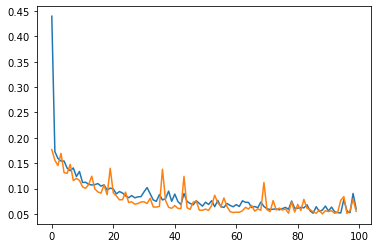

In [71]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

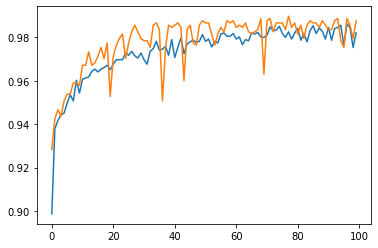

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [73]:
# early stopping

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y_oh)
model = Sequential()
model.add(Dense(36, activation='relu', input_dim=12))
model.add(Dense(18, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(2, activation='softmax'))
# model.summary()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [91]:
from tensorflow.keras.callbacks import EarlyStopping

In [92]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=7)

In [93]:
modelpath = './deep_model/model_check/{epoch:02d}-{val_loss:4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=1, \
                               save_best_only=True)

In [94]:
history = model.fit(x_train, y_train, validation_split=0.2, batch_size=50, epochs=200, \
                    callbacks=[checkpointer, early_stopping_callback])

Epoch 1/200
54/78 [===================>..........] - ETA: 0s - loss: 0.3932 - accuracy: 0.8130 
Epoch 1: val_loss improved from inf to 0.21702, saving model to ./deep_model/model_check\01-0.217017.hdf5
78/78 [==============================] - 0s 3ms/step - loss: 0.3512 - accuracy: 0.8440 - val_loss: 0.2170 - val_accuracy: 0.9262
Epoch 2/200
50/78 [==================>...........] - ETA: 0s - loss: 0.1969 - accuracy: 0.9368
Epoch 2: val_loss improved from 0.21702 to 0.15990, saving model to ./deep_model/model_check\02-0.159904.hdf5
78/78 [==============================] - 0s 1ms/step - loss: 0.1893 - accuracy: 0.9405 - val_loss: 0.1599 - val_accuracy: 0.9446
Epoch 3/200
54/78 [===================>..........] - ETA: 0s - loss: 0.1668 - accuracy: 0.9452
Epoch 3: val_loss did not improve from 0.15990
78/78 [==============================] - 0s 1ms/step - loss: 0.1658 - accuracy: 0.9456 - val_loss: 0.2300 - val_accuracy: 0.9159
Epoch 4/200
55/78 [====================>.........] - ETA: 0s - l

78/78 [==============================] - 0s 1ms/step - loss: 0.0614 - accuracy: 0.9800 - val_loss: 0.0988 - val_accuracy: 0.9672
Epoch 28/200
58/78 [=====================>........] - ETA: 0s - loss: 0.0646 - accuracy: 0.9797
Epoch 28: val_loss did not improve from 0.07073
78/78 [==============================] - 0s 1ms/step - loss: 0.0609 - accuracy: 0.9795 - val_loss: 0.1082 - val_accuracy: 0.9651
Epoch 29/200
49/78 [=================>............] - ETA: 0s - loss: 0.0693 - accuracy: 0.9780
Epoch 29: val_loss did not improve from 0.07073
78/78 [==============================] - 0s 1ms/step - loss: 0.0643 - accuracy: 0.9782 - val_loss: 0.0937 - val_accuracy: 0.9662
Epoch 30/200
56/78 [====================>.........] - ETA: 0s - loss: 0.0704 - accuracy: 0.9754
Epoch 30: val_loss did not improve from 0.07073
78/78 [==============================] - 0s 1ms/step - loss: 0.0656 - accuracy: 0.9769 - val_loss: 0.0751 - val_accuracy: 0.9774
Epoch 31/200
78/78 [==============================] 

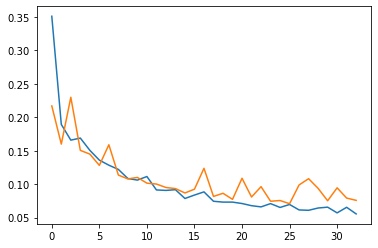

In [95]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

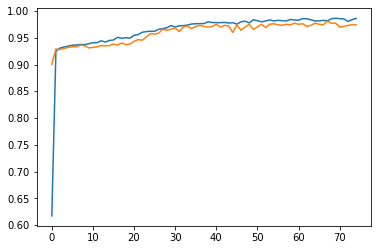

In [89]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [96]:
model.evaluate(x_test, y_test)

51/51 [==============================] - 0s 678us/step - loss: 0.0875 - accuracy: 0.9723


[0.08751431107521057, 0.9723076820373535]